<a href="https://colab.research.google.com/github/Namit-Joshi/Handwritten-Digit-Classification/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

# **Loading the Dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# plt.subplot(221)
# plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

# plt.subplot(222)
# plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

# plt.subplot(223)
# plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))

# plt.subplot(224)
# plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# plt.show()

# **Preprocessing**

The shape of X_train is (60000, 28, 28). Each image has 28 x 28 resolution. The shape of X_test is (10000, 28, 28).

---



---



The input shape that a CNN accepts should be in a specific format. If you are using Tensorflow, the format should be (batch, height, width, channels). If you are using Theano, the format should be (batch, channels, height, width).

Now the shape of X_train is (60000, 28, 28, 1). As all the images are in grayscale, the number of channels is 1. If it was a color image, then the number of channels would be 3 (R, G, B).


---



---


Here we’ve rescaled the image data so that each pixel lies in the interval [0, 1] instead of [0, 255]. It is always a good idea to normalize the input so that each dimension has approximately the same scale.

Now, we need to one-hot encode the labels i.e. Y_train and Y_test. In one-hot encoding an integer is converted to an array which contains only one ‘1’ and the rest elements are ‘0’.



---



---



Example:  Y_train[0] = [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.] since the label representated by it is 5.

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [ ]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

# **Building our CNN Model**

In [ ]:
# Three steps to create a CNN
# 1. Convolution
# 2. Activation
# 3. Pooling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# **Data Augmentation**

To reduce over-fitting, we use another technique known as Data Augmentation. Data augmentation rotates, shears, zooms, etc the image so that the model learns to generalize and not remember specific data. If the model overfits, it will perform very well on the images that it already knows but will fail if new images are given to it.

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

# **Creating Batches**

In [ ]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

# **Training the Model**

In [ ]:
model.fit(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5
937/937 [==============================] - 188s 201ms/step - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.0179 - val_accuracy: 0.9939
Epoch 2/5
937/937 [==============================] - 189s 202ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0286 - val_accuracy: 0.9918
Epoch 3/5
937/937 [==============================] - 189s 201ms/step - loss: 0.0264 - accuracy: 0.9917 - val_loss: 0.0279 - val_accuracy: 0.9909
Epoch 4/5
937/937 [==============================] - 190s 202ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0226 - val_accuracy: 0.9929
Epoch 5/5
937/937 [==============================] - 189s 202ms/step - loss: 0.0249 - accuracy: 0.9924 - val_loss: 0.0204 - val_accuracy: 0.9932


# **Making Prediction on Uploaded Sample Image**

In [ ]:
from google.colab import files
from PIL import Image
from io import BytesIO
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['sample_image.png']))

Saving sample_image.png to sample_image (2).png


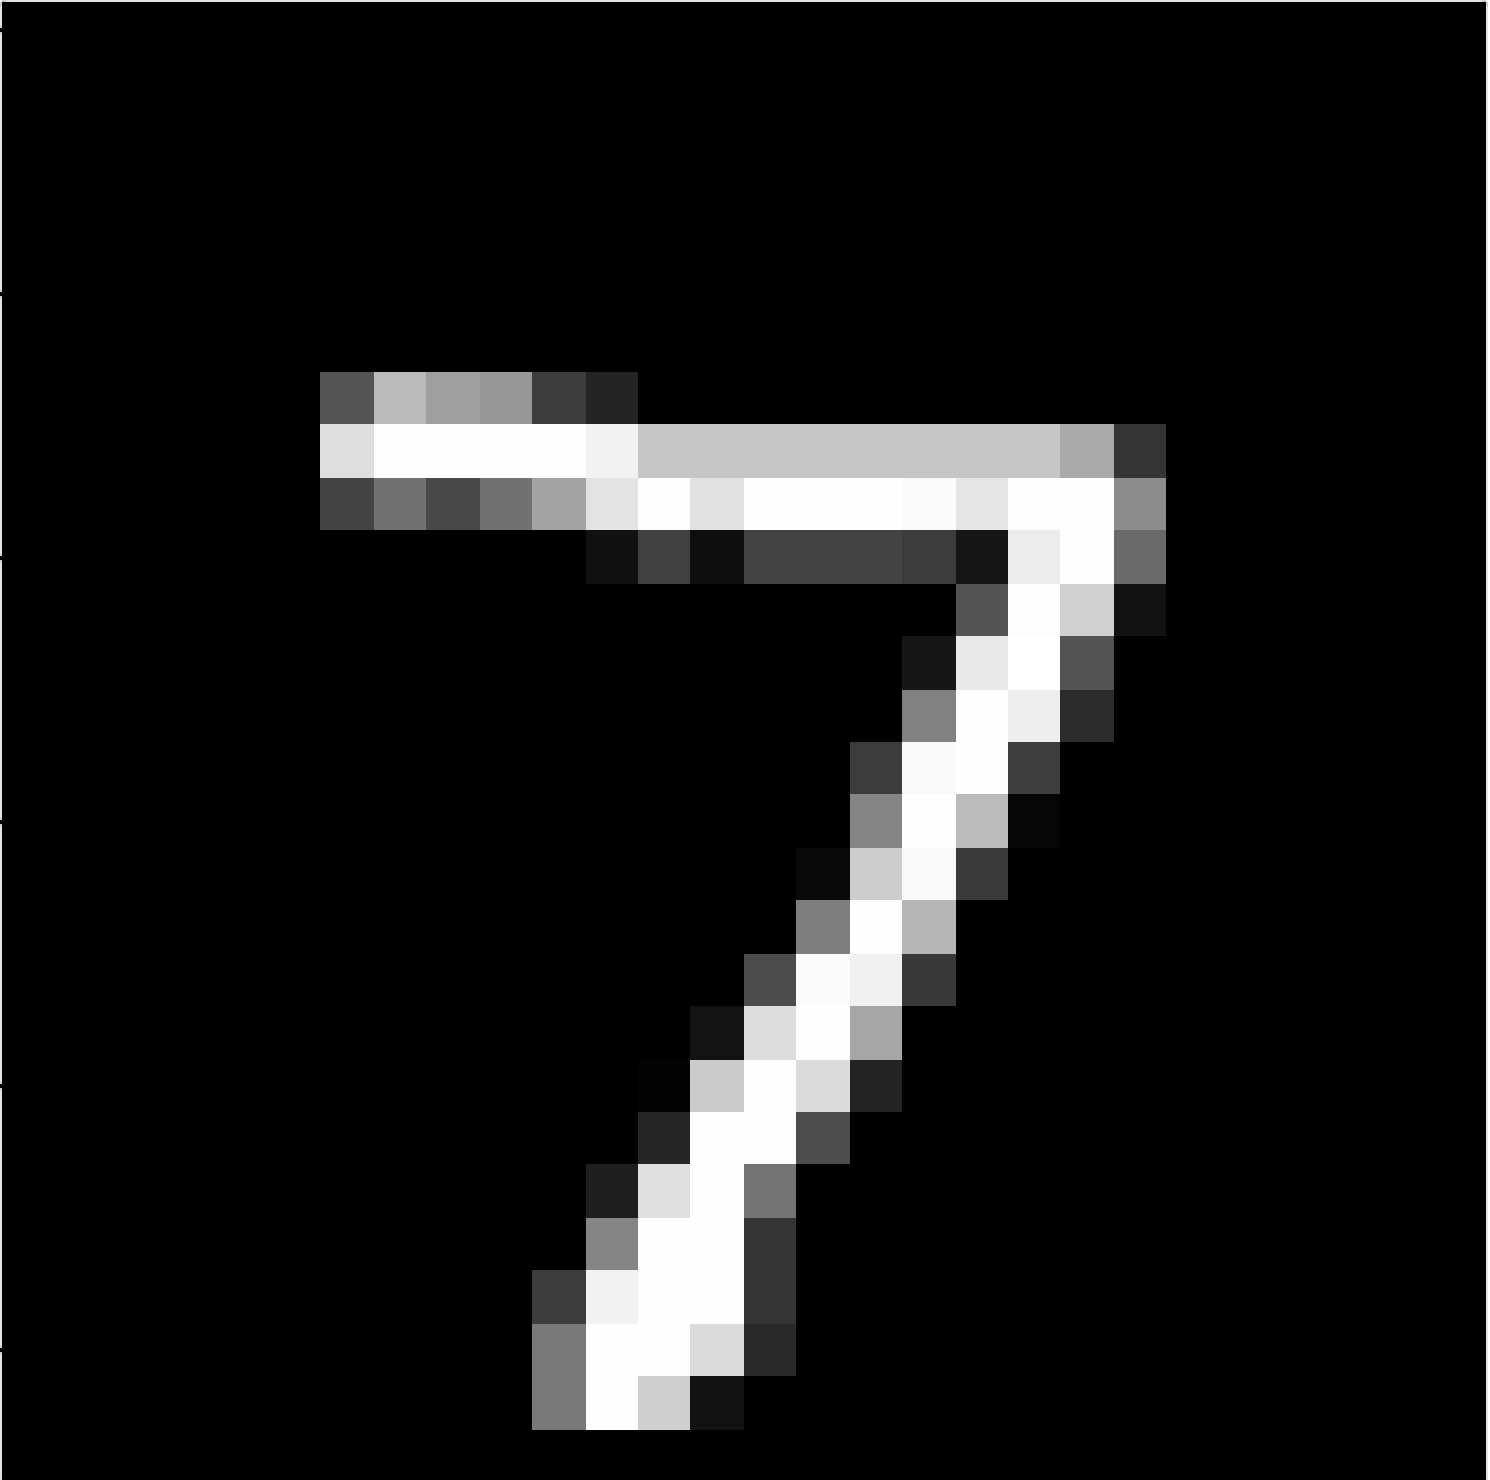

In [ ]:
im

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [ ]:
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.png')
	# load model
	digit = np.argmax(model.predict(img), axis=-1)
	print(digit[0])

# **Label Predicted**

In [ ]:
run_example()

7
